##

[https://www.kaggle.com/gabriellima/house-sales-in-king-county-usa]

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler

from subprocess import check_output

#print(check_output(["dir", "./input"]).decode("utf8"))

In [6]:
df=pd.read_csv("./input/kc_train.csv", header=None)

features=['date','price','bedrooms','bathrooms','sqft_living','sqft_lot','floors','grade','sqft_above','sqft_basement','yr_built','yr_renovated','lat','long','distance']

df.columns=features

df.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,grade,sqft_above,sqft_basement,yr_built,yr_renovated,lat,long,distance
0,20150302,545000,3,2.25,1670,6240,1.0,8,1240,430,1974,0,47.6413,-122.113,13558.890160
1,20150211,785000,4,2.50,3300,10514,2.0,10,3300,0,1984,0,47.6323,-122.036,17286.596180
2,20150107,765000,3,3.25,3190,5283,2.0,9,3190,0,2007,0,47.5534,-122.002,17119.313980
3,20141103,720000,5,2.50,2900,9525,2.0,9,2900,0,1989,0,47.5442,-122.138,6919.062119
4,20140603,449500,5,2.75,2040,7488,1.0,7,1200,840,1969,0,47.7289,-122.172,20544.169770


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 15 columns):
date             10000 non-null int64
price            10000 non-null int64
bedrooms         10000 non-null int64
bathrooms        10000 non-null float64
sqft_living      10000 non-null int64
sqft_lot         10000 non-null int64
floors           10000 non-null float64
grade            10000 non-null int64
sqft_above       10000 non-null int64
sqft_basement    10000 non-null int64
yr_built         10000 non-null int64
yr_renovated     10000 non-null int64
lat              10000 non-null float64
long             10000 non-null float64
distance         10000 non-null float64
dtypes: float64(5), int64(10)
memory usage: 1.1 MB


In [8]:
np.round(df.describe())

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,grade,sqft_above,sqft_basement,yr_built,yr_renovated,lat,long,distance
count,10000.0,10000.0,10000.0,10000.0,10000.0,10000.0,10000.0,10000.0,10000.0,10000.0,10000.0,10000.0,10000.0,10000.0,10000.0
mean,20143916.0,542875.0,3.0,2.0,2082.0,15353.0,2.0,8.0,1791.0,291.0,1971.0,85.0,48.0,-122.0,16988.0
std,4441.0,372926.0,1.0,1.0,923.0,45776.0,1.0,1.0,829.0,447.0,29.0,403.0,0.0,0.0,7861.0
min,20140502.0,75000.0,0.0,0.0,390.0,572.0,1.0,3.0,390.0,0.0,1900.0,0.0,47.0,-123.0,258.0
25%,20140722.0,322500.0,3.0,2.0,1430.0,5023.0,1.0,7.0,1190.0,0.0,1952.0,0.0,47.0,-122.0,11123.0
50%,20141017.0,450700.0,3.0,2.0,1910.0,7590.0,2.0,7.0,1560.0,0.0,1975.0,0.0,48.0,-122.0,16845.0
75%,20150217.0,645000.0,4.0,2.0,2550.0,10717.0,2.0,8.0,2212.0,560.0,1997.0,0.0,48.0,-122.0,22260.0
max,20150527.0,6885000.0,10.0,8.0,9890.0,1651359.0,4.0,13.0,8860.0,4820.0,2015.0,2015.0,48.0,-121.0,70967.0


In [11]:
df.isnull().any()

date             False
price            False
bedrooms         False
bathrooms        False
sqft_living      False
sqft_lot         False
floors           False
grade            False
sqft_above       False
sqft_basement    False
yr_built         False
yr_renovated     False
lat              False
long             False
distance         False
dtype: bool

In [12]:
df.corr()['price'].sort_values(ascending=False)

price            1.000000
sqft_living      0.698923
grade            0.667086
sqft_above       0.600657
bathrooms        0.533221
sqft_basement    0.328690
bedrooms         0.314395
lat              0.304946
floors           0.240563
yr_renovated     0.120399
sqft_lot         0.094499
yr_built         0.059483
long             0.027786
date             0.006070
distance        -0.239675
Name: price, dtype: float64

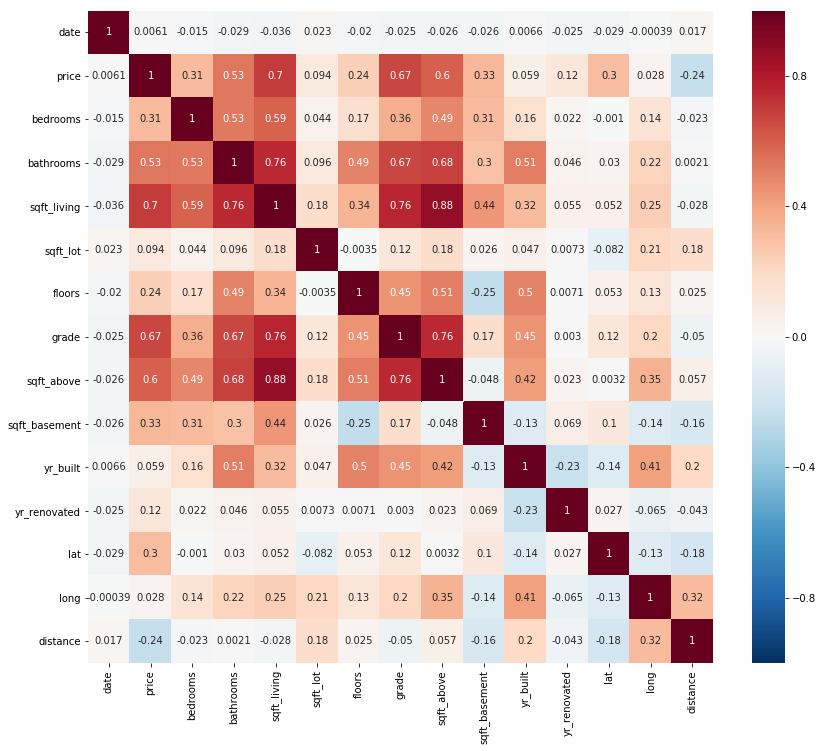

In [13]:
correlation=df.corr()
plt.figure(figsize=(14,12))
heatmap=sns.heatmap(correlation, annot=True, linewidths=0, vmin=-1, cmap="RdBu_r")

In [15]:
x=df.drop(['date','price'],axis=1)
y=df[['price']]

model=LinearRegression()
scores=cross_val_score(model, x, y, cv=10)
print("Cross-validation scores: {}".format(scores))
print("Average cross-validation score: {:.2f}".format(scores.mean()))

Cross-validation scores: [0.6410479  0.65935011 0.68727191 0.65007675 0.66889137 0.64912534
 0.66573959 0.69634711 0.64304508 0.64419781]
Average cross-validation score: 0.66
